<a href="https://colab.research.google.com/github/Pranov1984/NLP-application-to-classify-the-sentiment-on-Moview-Reviews/blob/master/SeqNLP_Project1_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Classification


## Loading the dataset

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from keras.datasets import imdb
from keras import preprocessing
vocab_size = 10000 #vocab size

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size) # vocab_size is no.of words to consider from the dataset, ordering based on frequency.

Using TensorFlow backend.


17465344/17464789 [==============================] - 0s 0us/step


In [0]:
vocab_size = 10000 #vocab size

In [0]:
x_train.shape, x_test.shape

((25000,), (25000,))

In [0]:
y_test.shape

(25000,)

In [0]:
from keras.preprocessing.sequence import pad_sequences
vocab_size = 10000 #vocab size
maxlen = 300  #number of word used from each review

## Train test split

In [0]:
#make all sequences of the same length
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [0]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((25000, 300), (25000, 300), (25000,), (25000,))

## Build Keras Embedding Layer Model
We can think of the Embedding layer as a dicionary that maps a index assigned to a word to a word vector. This layer is very flexible and can be used in a few ways:

* The embedding layer can be used at the start of a larger deep learning model. 
* Also we could load pre-train word embeddings into the embedding layer when we create our model.
* Use the embedding layer to train our own word2vec models.

The keras embedding layer doesn't require us to onehot encode our words, instead we have to give each word a unqiue intger number as an id. For the imdb dataset this has already been done, but if this wasn't the case we could use sklearn [LabelEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).

In [0]:
#sequence encoding and padding
x_train[7128]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    1,
         13,  340, 1041,   19,    4,   85,  931,  2

In [0]:
#Model Building with word embedding

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import LSTM, Dense, Embedding, GRU, Conv1D, MaxPool1D, Flatten, Dropout, SpatialDropout1D
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow.python.keras.backend as K
K.clear_session()

In [0]:
# model
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=maxlen))
model.add(Conv1D(100, 3, padding='same', activation='relu'))
model.add(MaxPool1D())
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 100)          1000000   
_________________________________________________________________
conv1d (Conv1D)              (None, 300, 100)          30100     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 150, 100)          0         
_________________________________________________________________
flatten (Flatten)            (None, 15000)             0         
_________________________________________________________________
dense (Dense)                (None, 250)               3750250   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 251       
Total params: 4,780,601
Trainable params: 4,780,601
Non-trainable params: 0
______________________________________________

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=["acc"]) 

In [0]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)  
mc=ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True,verbose=1)

In [0]:
history = model.fit(x_train,y_train,batch_size=1200,epochs=50,validation_data=(x_test,y_test),verbose=1)

Epoch 1/50
21/21 [==============================] - 4s 192ms/step - loss: 0.7094 - acc: 0.5020 - val_loss: 0.6928 - val_acc: 0.5000
Epoch 2/50
21/21 [==============================] - 4s 171ms/step - loss: 0.6909 - acc: 0.5065 - val_loss: 0.6885 - val_acc: 0.5000
Epoch 3/50
21/21 [==============================] - 4s 169ms/step - loss: 0.6519 - acc: 0.5704 - val_loss: 0.5804 - val_acc: 0.7157
Epoch 4/50
21/21 [==============================] - 4s 168ms/step - loss: 0.4985 - acc: 0.8408 - val_loss: 0.4845 - val_acc: 0.8738
Epoch 5/50
21/21 [==============================] - 4s 168ms/step - loss: 0.4279 - acc: 0.9154 - val_loss: 0.4796 - val_acc: 0.8768
Epoch 6/50
21/21 [==============================] - 4s 169ms/step - loss: 0.3909 - acc: 0.9342 - val_loss: 0.4840 - val_acc: 0.8698
Epoch 7/50
21/21 [==============================] - 4s 170ms/step - loss: 0.2562 - acc: 0.9516 - val_loss: 0.3525 - val_acc: 0.8732
Epoch 8/50
21/21 [==============================] - 4s 171ms/step - loss: 0.

In [0]:
#Set the path where you want to store the model and weights. 
model.save('/content/drive/My Drive/Colab Notebooks/AIML/NLP/Week 4 - Project for Sequential NLP/best_model.h5')
model.save_weights('/content/drive/My Drive/Colab Notebooks/AIML/NLP/Week 4 - Project for Sequential NLP/best_model_weights.h5')

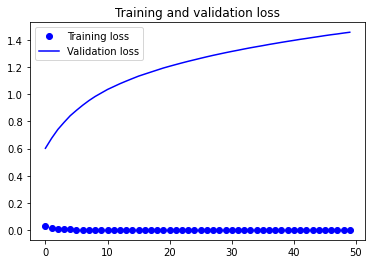

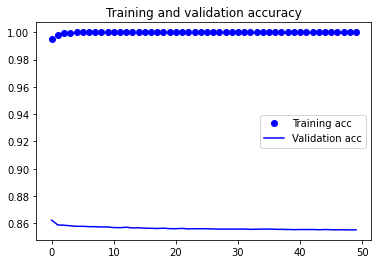

In [0]:
from matplotlib import pyplot as plt


loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(len(acc))

plt.figure()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

Try lstm architecture

In [0]:
# lstm model
model = Sequential()
model.add(Embedding(vocab_size, 64, input_length=maxlen))
model.add(Conv1D(32, 64, activation='relu'))
model.add(MaxPool1D(3))

model.add(Conv1D(32, 64, activation='relu'))
model.add(MaxPool1D(3))


model.add(LSTM(32,dropout=0.1, return_sequences=True,recurrent_dropout=0.2))

model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='sigmoid')) 
print(model.summary())

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 300, 64)           640000    
_________________________________________________________________
conv1d_30 (Conv1D)           (None, 237, 32)           131104    
_________________________________________________________________
max_pooling1d_30 (MaxPooling (None, 79, 32)            0         
_________________________________________________________________
conv1d_31 (Conv1D)           (None, 16, 32)            65568     
_________________________________________________________________
max_pooling1d_31 (MaxPooling (None, 5, 32)             0         
_________________________________________________________________
lstm_22 (LSTM)               (None, 5, 32)             8320      
_________________________________________________________________
dense_31 (Dense)             (None, 5, 64)           

In [0]:
model.compile(optimizer='rmsprop' ,loss='binary_crossentropy',metrics=["acc"])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)  
mc=ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True,verbose=1)
history = model.fit(x_train,y_train,batch_size=1200,epochs=10,validation_data=(x_test,y_test),verbose=1)

Epoch 1/10
21/21 [==============================] - 3s 138ms/step - loss: 0.6468 - acc: 0.6115 - val_loss: 0.7039 - val_acc: 0.6134
Epoch 2/10
21/21 [==============================] - 3s 123ms/step - loss: 0.4431 - acc: 0.8065 - val_loss: 0.3945 - val_acc: 0.8281
Epoch 3/10
21/21 [==============================] - 3s 122ms/step - loss: 0.3479 - acc: 0.8598 - val_loss: 0.3680 - val_acc: 0.8417
Epoch 4/10
21/21 [==============================] - 3s 121ms/step - loss: 0.2940 - acc: 0.8860 - val_loss: 0.3848 - val_acc: 0.8348
Epoch 5/10
21/21 [==============================] - 3s 121ms/step - loss: 0.2662 - acc: 0.8972 - val_loss: 0.3803 - val_acc: 0.8348
Epoch 6/10
21/21 [==============================] - 3s 121ms/step - loss: 0.2204 - acc: 0.9185 - val_loss: 0.5201 - val_acc: 0.7957
Epoch 7/10
21/21 [==============================] - 3s 122ms/step - loss: 0.2106 - acc: 0.9190 - val_loss: 0.4938 - val_acc: 0.8206
Epoch 8/10
21/21 [==============================] - 3s 121ms/step - loss: 0.

In [0]:
#Set the path where you want to store the model and weights. 
model.save('/content/drive/My Drive/Colab Notebooks/AIML/NLP/Week 4 - Project for Sequential NLP/best_model.h5')
model.save_weights('/content/drive/My Drive/Colab Notebooks/AIML/NLP/Week 4 - Project for Sequential NLP/best_model_weights.h5')

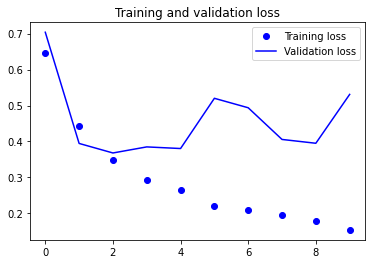

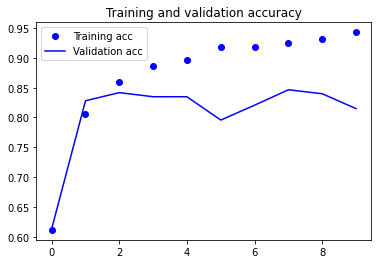

In [0]:
from matplotlib import pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(len(acc))

plt.figure()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

In [0]:
len(x_test[0])

300

In [0]:
type(x1)

numpy.ndarray

In [0]:
model.predict(x_test)[10]

array([[0.8693156 ],
       [0.92192477],
       [0.9611767 ],
       [0.9832765 ],
       [0.98865116]], dtype=float32)

In [0]:
#LSTM & GRU model
model = Sequential()
model.add(Embedding(vocab_size, 64, input_length=maxlen))
model.add(Conv1D(32, 64, activation='relu'))
model.add(MaxPool1D(3))

model.add(Conv1D(32, 32, activation='relu'))
model.add(MaxPool1D(1))

model.add(GRU(16,dropout=0.2, return_sequences=True,recurrent_dropout=0.5))
model.add(LSTM(16,dropout=0.1, return_sequences=True,recurrent_dropout=0.2))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='sigmoid')) 
print(model.summary())

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 300, 64)           640000    
_________________________________________________________________
conv1d_32 (Conv1D)           (None, 237, 32)           131104    
_________________________________________________________________
max_pooling1d_32 (MaxPooling (None, 79, 32)            0         
_________________________________________________________________
conv1d_33 (Conv1D)           (None, 48, 32)            32800     
_________________________________________________________________
max_pooling1d_33 (MaxPooling (None, 48, 32)            0         
_________________________________________________________________
gru (GRU)                    (None, 48, 16)            2400      
_________________________________________________________________
lstm_23 (LSTM)               (None, 48, 16)          

In [0]:
model.compile(optimizer='rmsprop' ,loss='binary_crossentropy',metrics=["acc"])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)  
mc=ModelCheckpoint('best_model_gru.h5', monitor='val_loss', mode='min', save_best_only=True,verbose=1)
history = model.fit(x_train,y_train,batch_size=1200,epochs=10,validation_data=(x_test,y_test),verbose=1)

Epoch 1/10
21/21 [==============================] - 10s 453ms/step - loss: 0.6699 - acc: 0.5694 - val_loss: 0.5098 - val_acc: 0.7547
Epoch 2/10
21/21 [==============================] - 9s 435ms/step - loss: 0.4667 - acc: 0.7934 - val_loss: 0.7601 - val_acc: 0.6768
Epoch 3/10
21/21 [==============================] - 9s 429ms/step - loss: 0.3680 - acc: 0.8470 - val_loss: 0.3884 - val_acc: 0.8309
Epoch 4/10
21/21 [==============================] - 9s 428ms/step - loss: 0.3074 - acc: 0.8781 - val_loss: 0.3641 - val_acc: 0.8427
Epoch 5/10
21/21 [==============================] - 9s 430ms/step - loss: 0.2637 - acc: 0.9010 - val_loss: 0.5455 - val_acc: 0.7741
Epoch 6/10
21/21 [==============================] - 9s 432ms/step - loss: 0.2313 - acc: 0.9120 - val_loss: 0.5269 - val_acc: 0.8134
Epoch 7/10
21/21 [==============================] - 9s 434ms/step - loss: 0.2200 - acc: 0.9166 - val_loss: 0.4445 - val_acc: 0.8298
Epoch 8/10
21/21 [==============================] - 9s 425ms/step - loss: 0

In [0]:
# load best model
#Set the path where you want to store the model and weights. 
model.save('/content/drive/My Drive/Colab Notebooks/AIML/NLP/Week 4 - Project for Sequential NLP/best_model_gru.h5')
model.save_weights('/content/drive/My Drive/Colab Notebooks/AIML/NLP/Week 4 - Project for Sequential NLP/best_model_gru_weights.h5')

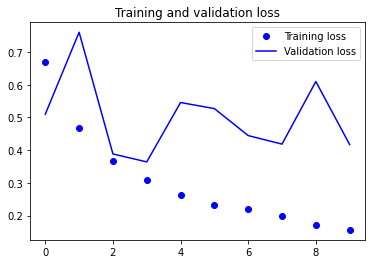

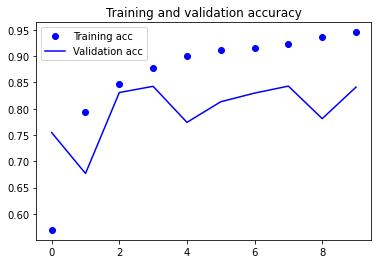

In [0]:
from matplotlib import pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(len(acc))

plt.figure()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

In [0]:
#GRU model
model = Sequential()
model.add(Embedding(vocab_size, 64, input_length=maxlen))
model.add(Conv1D(32, 64, activation='relu'))
model.add(MaxPool1D(3))

model.add(Conv1D(32, 32, activation='relu'))
model.add(MaxPool1D(1))

model.add(GRU(32,dropout=0.2, return_sequences=True,recurrent_dropout=0.5))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='sigmoid')) 
#print(model.summary())

model.compile(optimizer='rmsprop' ,loss='binary_crossentropy',metrics=["acc"])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)  
mc=ModelCheckpoint('best_model_gru.h5', monitor='val_loss', mode='min', save_best_only=True,verbose=1)
history = model.fit(x_train,y_train,batch_size=1200,epochs=10,validation_data=(x_test,y_test),verbose=1)

Epoch 1/10
21/21 [==============================] - 6s 272ms/step - loss: 0.6622 - acc: 0.6018 - val_loss: 0.5169 - val_acc: 0.7783
Epoch 2/10
21/21 [==============================] - 5s 258ms/step - loss: 0.4242 - acc: 0.8170 - val_loss: 0.4680 - val_acc: 0.8016
Epoch 3/10
21/21 [==============================] - 5s 251ms/step - loss: 0.3307 - acc: 0.8628 - val_loss: 0.5738 - val_acc: 0.7434
Epoch 4/10
21/21 [==============================] - 5s 257ms/step - loss: 0.2888 - acc: 0.8814 - val_loss: 0.3750 - val_acc: 0.8423
Epoch 5/10
21/21 [==============================] - 5s 260ms/step - loss: 0.2455 - acc: 0.9032 - val_loss: 0.4246 - val_acc: 0.8226
Epoch 6/10
21/21 [==============================] - 5s 257ms/step - loss: 0.2135 - acc: 0.9178 - val_loss: 0.4206 - val_acc: 0.8383
Epoch 7/10
21/21 [==============================] - 5s 261ms/step - loss: 0.1895 - acc: 0.9270 - val_loss: 0.4507 - val_acc: 0.8310
Epoch 8/10
21/21 [==============================] - 6s 265ms/step - loss: 0.

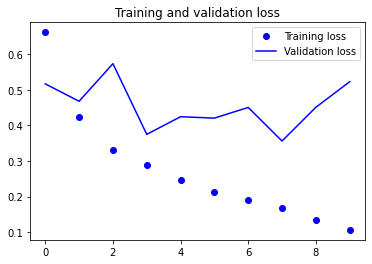

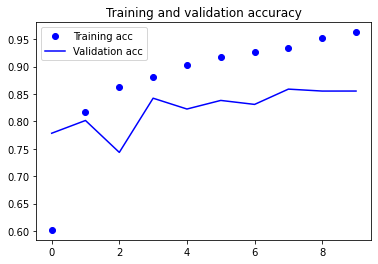

In [0]:
from matplotlib import pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(len(acc))

plt.figure()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()



```
Try Bidirectional LSTM
```



# Try Bidirectional LSTM

In [0]:
#reduce the maximum length of each sequence to different numbers and try building the model.

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size) # vocab_size is no.of words to consider from the dataset, ordering based on frequency.

In [0]:
maxlen=20

#make all sequences of the same length
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [0]:
model = Sequential()
model.add(Embedding(vocab_size,50, input_length=maxlen))
model.add(SpatialDropout1D(0.2))


model.add(Bidirectional(LSTM(128, recurrent_dropout=0.1,return_sequences=True)))
model.add(Bidirectional(LSTM(64, recurrent_dropout=0.1,return_sequences=True )))
model.add(Bidirectional(LSTM(32, recurrent_dropout=0.1,return_sequences=True )))
model.add(Dropout(0.25))

model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

epochs = 10
batch_size = 1200
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)  
mc=ModelCheckpoint('best_model_bi-lstm.h5', monitor='val_loss', mode='min', save_best_only=True,verbose=1)
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_split=0.2)

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 20, 50)            500000    
_________________________________________________________________
spatial_dropout1d_15 (Spatia (None, 20, 50)            0         
_________________________________________________________________
bidirectional_25 (Bidirectio (None, 20, 256)           183296    
_________________________________________________________________
bidirectional_26 (Bidirectio (None, 20, 128)           164352    
_________________________________________________________________
bidirectional_27 (Bidirectio (None, 20, 64)            41216     
_________________________________________________________________
dropout_10 (Dropout)         (None, 20, 64)            0         
_________________________________________________________________
dense_26 (Dense)             (None, 20, 64)          

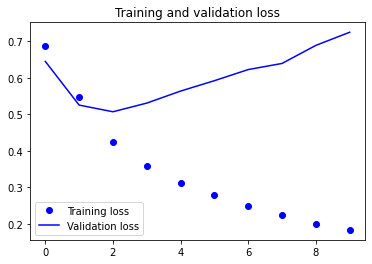

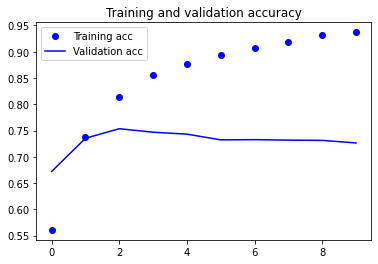

In [0]:
# We see that accuracy is compromised with reduced sequence length but the model training takes much lesser time

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(acc))

plt.figure()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

In [0]:
y_hat = model.predict(x_test)
y_pred=np.round(y_hat)

In [0]:
print('Accuracy Achieved: ',accuracy_score(y_test,y_pred))

In [0]:
#Try again with increased sequence length
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size) # vocab_size is no.of words to consider from the dataset, ordering based on frequency.

maxlen=300

#make all sequences of the same length
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [0]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import *
from keras.initializers import Constant

In [0]:
model = Sequential()
model.add(Embedding(vocab_size, 64, input_length=maxlen))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(32, recurrent_dropout=0.1,return_sequences=True)))
model.add(Bidirectional(LSTM(16, recurrent_dropout=0.1)))
model.add(Dropout(0.25))

model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 64)           640000    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 300, 64)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 300, 64)           24832     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 32)                10368     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                2112      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6

In [0]:
epochs = 10
batch_size = 1200
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)  
mc=ModelCheckpoint('best_model_bi-lstm.h5', monitor='val_loss', mode='min', save_best_only=True,verbose=1)
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_split=0.2)

Epoch 1/10
17/17 [==============================] - 103s 6s/step - loss: 0.6920 - accuracy: 0.5287 - val_loss: 0.6889 - val_accuracy: 0.5314
Epoch 2/10
17/17 [==============================] - 102s 6s/step - loss: 0.6464 - accuracy: 0.6977 - val_loss: 0.5545 - val_accuracy: 0.7394
Epoch 3/10
17/17 [==============================] - 101s 6s/step - loss: 0.4188 - accuracy: 0.8279 - val_loss: 0.3728 - val_accuracy: 0.8368
Epoch 4/10
17/17 [==============================] - 103s 6s/step - loss: 0.2813 - accuracy: 0.8962 - val_loss: 0.3222 - val_accuracy: 0.8718
Epoch 5/10
17/17 [==============================] - 104s 6s/step - loss: 0.2062 - accuracy: 0.9281 - val_loss: 0.3129 - val_accuracy: 0.8816
Epoch 6/10
17/17 [==============================] - 104s 6s/step - loss: 0.1573 - accuracy: 0.9475 - val_loss: 0.3454 - val_accuracy: 0.8782
Epoch 7/10
17/17 [==============================] - 106s 6s/step - loss: 0.1216 - accuracy: 0.9626 - val_loss: 0.3934 - val_accuracy: 0.8786
Epoch 8/10
17

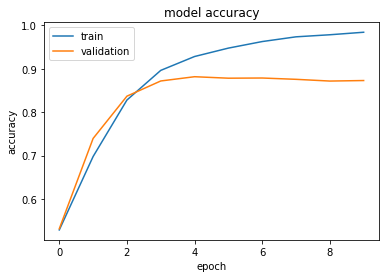

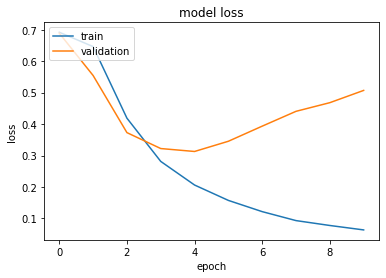

In [0]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [0]:
# load best model
#Set the path where you want to store the model and weights. 
model.save('/content/drive/My Drive/Colab Notebooks/AIML/NLP/Week 4 - Project for Sequential NLP/best_model_bi-lstm.h5')
model.save_weights('/content/drive/My Drive/Colab Notebooks/AIML/NLP/Week 4 - Project for Sequential NLP/best_model_bi-lstm_weights.h5')

In [0]:
# evaluate the model
loss, accuracy = model.evaluate(x_train, y_train, verbose=2)
print('Training_Accuracy: %f' % (accuracy*100))

782/782 - 330s - loss: 0.1365 - accuracy: 0.9666
Training_Accuracy: 96.664000


In [0]:
y_hat = model.predict(x_test)
y_pred=np.round(y_hat)

In [0]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print(classification_report(y_pred,y_test))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.84      0.87     13324
         1.0       0.83      0.89      0.86     11676

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000

0.86216


In [0]:
y_pred

array([[1.],
       [1.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]], dtype=float32)

## Retrive the output of each layer in keras for a given single test sample from the trained model you built

In [0]:
#Load the pre-trained saved model and load the weights

from tensorflow.python.keras.models import load_model
import numpy as np
from tensorflow.python.keras.preprocessing import image

# Load the pre trained model from the HDF5 file saved previously
pretrained_model = load_model('/content/drive/My Drive/Colab Notebooks/AIML/NLP/Week 4 - Project for Sequential NLP/best_model_bi-lstm.h5')
pretrained_model.load_weights('/content/drive/My Drive/Colab Notebooks/AIML/NLP/Week 4 - Project for Sequential NLP/best_model_bi-lstm_weights.h5')

In [0]:
y_hat = model.predict(x_test)

In [0]:
y_pred=np.round(y_hat)
y_pred = y_pred.astype(int)

In [0]:
from more_itertools import one
one(y_pred[0])

0

In [0]:
print('24999th Label of test set: ', y_test[24999])
print('Prediction for the above is: ', one(y_pred[24999]))

24999th Label of test set:  0
Prediction for the above is:  0


In [0]:
print('10005th Label of test set: ', y_test[10005])
print('Prediction for the above is: ', one(y_pred[10005]))

10005th Label of test set:  0
Prediction for the above is:  0


In [0]:
print('1000th Label of test set: ', y_test[1])
print('Prediction for the above is: ', one(y_pred[1]))

1000th Label of test set:  1
Prediction for the above is:  1


In [0]:
def get_original_text(i):
    word_to_id = imdb.get_word_index()
    word_to_id = {k:(v+3) for k,v in word_to_id.items()}
    word_to_id["#"] = 0
    word_to_id["<START>"] = 1
    word_to_id["<UNK>"] = 2

    id_to_word = {value:key for key,value in word_to_id.items()}
    return ' '.join(id_to_word[id] for id in x_test[i])


SentimentDict={1:'positive', 0:'negative'}
def display_test_sentiment(i):
    print(get_original_text(i))
    print('label: ', SentimentDict[y_test[i]], ', prediction: ', SentimentDict[one(y_pred[i])])

In [0]:
display_test_sentiment(1)

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # <START> this film requires a lot of patience because it focuses on mood and character development the plot is very simple and many of the scenes take place on the same set in frances <UNK> the sandy dennis character apartment but the film builds to a disturbing climax br br the characters create an atmosphere <UNK> with sexual tension and psychological <UNK> it's very interesting that robert altman directed this considering the style and structure of his other films still the trademark altman audio style is evident here and there i think what really makes this film work is the brilliant performance by sandy dennis it's definitely one of her darker characters but she plays it so perfectly and convincingly that it's scary michael burns does a good job as the mute young man regular altman player michael murphy has a small part the <UNK> moody set fits the content of the story very well in short this movie is a

In [0]:
display_test_sentiment(12500)

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # <START> crap i accidentally watched this film thinking that it was the swimming <UNK> that was released in 2003 i seriously regret wasting an hour of my life sitting through it shame on whoever gave this junk an award i thoroughly <UNK> this film in fact i didn't see it through to the end after an hour i could no longer stand it i am disgusted that people are amused by such a lousy script which tries and fails to rip off a dozen other human interest stories and such <UNK> ad acting painful i rate it 1 star out of 10 an amateur could make a much much greater movie
label:  negative , prediction:  negative


In [0]:
y_test[12500]

0

Best model results were achieved with the bidirectional lstm with 300 sequence length of the reviews as can be seen above